 # Шаг 1: Установка и импорт библиотек

In [3]:
!pip install lightautoml

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Шаг 2: Загрузка и исследование данных

Mounted at /content/drive
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePri

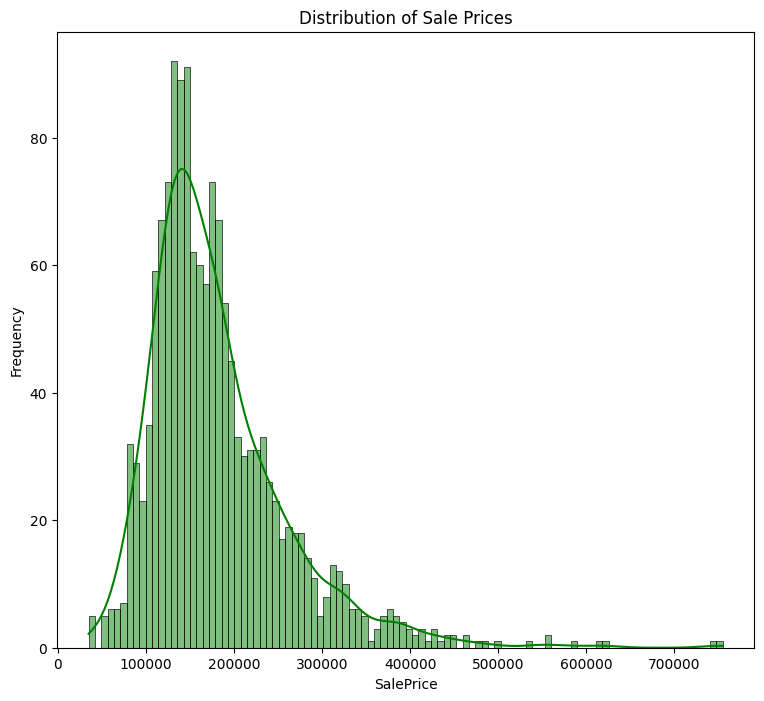

In [4]:
# Загрузка файла в Google Colab
from google.colab import drive
drive.mount("/content/drive")

train_file_path = "/content/drive/MyDrive/Colab Notebooks/ML/Regression task using the LightAutoML framework/train.csv"

# Загрузка данных в DataFrame
data = pd.read_csv(train_file_path)

# Просмотр первых нескольких строк данных
print(data.head())

# Просмотр информации данных
print(data.info())

# Распределение цен на дома
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(data['SalePrice'], color='g', bins=100, kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()

# Шаг 3: Подготовка данных

In [5]:
# Создадаю новую фичу OverallScore, объединяющую OverallQual и OverallCond

data['OverallScore'] = data['OverallQual'] + data['OverallCond']

# Шаг 4: Разделение данных на обучающую и тестовую выборки

In [6]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Шаг 5: Определение целевой переменной и признаков

In [7]:
target = 'SalePrice'
features = [col for col in train_data.columns if col != target]

# Шаг 6: Определение задачи

In [8]:
# Определение задачи регрессии

from lightautoml.tasks import Task
task = Task('reg')

# Шаг 7: Создание и обучение модели

In [9]:
# Создаю и обучаю модель с использованием TabularAutoML

automl = TabularAutoML(task=task, timeout=3600, cpu_limit=4, memory_limit=16)
oof_pred = automl.fit_predict(train_data, roles={'target': target})

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (1168, 82)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3580.02 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 

# Шаг 8: Оценка модели на кросс-валидации

In [10]:
# Оценка модели на кросс-валидации с использованием метрики MAE

mae = mean_absolute_error(train_data[target].values, oof_pred.data[:, 0])
print(f'MAE на кросс-валидации: {mae}')

MAE на кросс-валидации: 15013.80108224529


# Шаг 9: Прогнозирование на тестовой выборке

In [11]:
test_pred = automl.predict(test_data)

# Шаг 10: Оценка модели на тестовой выборке

In [12]:
# Оценка модели на тестовой выборке с использованием метрики MAE
test_mae = mean_absolute_error(test_data[target].values, test_pred.data[:, 0])
print(f'MAE на тестовой выборке: {test_mae}')

MAE на тестовой выборке: 15589.690991545376


# Шаг 11: Улучшение модели


In [13]:
# Создаю и обучаю улучшенную модель с использованием TabularUtilizedAutoML

automl_improved = TabularUtilizedAutoML(task=task, timeout=3600, cpu_limit=4, memory_limit=16)
oof_pred_improved = automl_improved.fit_predict(train_data, roles={'target': target})

Выходные данные были обрезаны до нескольких последних строк (5000).
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 4458.2440074	test: 25131.7305830	best: 25099.8203918 (676)	total: 1.1s	remaining: 2.03s
DEBUG:lightautoml.ml_algo.boost_cb:800:	learn: 3774.3271265	test: 25102.4308427	best: 25099.8203918 (676)	total: 1.25s	remaining: 1.86s
DEBUG:lightautoml.ml_algo.boost_cb:900:	learn: 3187.7696191	test: 25053.3784637	best: 25049.4280066 (895)	total: 1.39s	remaining: 1.69s
DEBUG:lightautoml.ml_algo.boost_cb:1000:	learn: 2748.2139879	test: 25026.5336348	best: 25025.9759813 (999)	total: 1.56s	remaining: 1.56s
DEBUG:lightautoml.ml_algo.boost_cb:1100:	learn: 2326.1260106	test: 25019.8707055	best: 25003.4377539 (1064)	total: 1.73s	remaining: 1.42s
DEBUG:lightautoml.ml_algo.boost_cb:1200:	learn: 1995.1566716	test: 25012.7307674	best: 25000.2807942 (1155)	total: 1.87s	remaining: 1.25s
DEBUG:lightautoml.ml_algo.boost_cb:1300:	learn: 1718.3103745	test: 24997.7443431	best: 24996.9133789 (1285)	tota

# Шаг 12: Оценка улучшенной модели на кросс-валидации

In [14]:
mae_improved = mean_absolute_error(train_data[target].values, oof_pred_improved.data[:, 0])
print(f'Улучшенный MAE на кросс-валидации: {mae_improved}')

Улучшенный MAE на кросс-валидации: 14194.872678991866


# Шаг 13: Прогнозирование на тестовой выборке для улучшенной модели


In [15]:
test_pred_improved = automl_improved.predict(test_data)

# Шаг 14: Оценка улучшенной модели на тестовой выборке


In [16]:
test_mae_improved = mean_absolute_error(test_data[target].values, test_pred_improved.data[:, 0])
print(f'Улучшенный MAE на тестовой выборке: {test_mae_improved}')

Улучшенный MAE на тестовой выборке: 15077.454783818494
